# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
#env.close()
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
#env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#states = env_info.vector_observations                  # get the current state (for each agent)
#scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

# Navigation - Student's project work

The following sections show my code and results from my work on this project.

### Import all necessary packages at once

In [8]:
# Import packages for the data processing before and after simulations
import time
import pickle
import math
import datetime
import random
import sys
import copy
import numpy as np
from collections import namedtuple, deque
import matplotlib.pyplot as plt
%matplotlib inline

# Import from PyTorch for neural network implementation
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Import to keep instance active while training on GPU
import workspace_utils
from workspace_utils import active_session

### Setting of variables for the neural network, training algorithms and unity environments

In [9]:
BUFFER_SIZE = int(1e5)     # replay buffer size
BATCH_SIZE = 128           # minibatch size
GAMMA = 0.99               # discount factor
TAU = 0.001                # for soft update of target parameters
LR = 0.0001                # learning rate for both networks

FC_SIZE = 32               # number of neurons in layer of neural network
P_DROPOUT = 0.0            # dropout probability for neurons and network regularization

ACTION_SIZE = brain.vector_action_space_size # number of actions
STATE_SIZE = states.shape[1]    # number of states
N_AGENTS = len(env_info.agents) # number of agents

N_EPISODES = 2000          # number of maximum episodes for training
MAX_T = 1000               # maximum time agent is in the environment in each episode

ENV_SOLVED = 30.0          # average score of agent to consider environment solved
RANDOM_SEED = 5            # seed integer for random number generator
MIN_EPISODES = 150         # minimum number of episodes to train

### Check if training on GPU is possible, else use CPU

In [10]:
# If GPU is available use for training otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

if device == "cpu":
    print("Available: CPU only")
else:
    print("Available: GPU cuda")

Available: GPU cuda


### Implementation of noise process added to actions of agent

Implementation follows the standard noise Ornstein-Uhlenbeck process as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

In [11]:
#Ornstein-Uhlenbeck stochastic noise process
class OUNoise:

    def __init__(self):

        self.theta = 0.15
        self.sigma = 0.2
        self.size = (N_AGENTS, ACTION_SIZE)
        self.mu = np.zeros(self.size) # mu = 0.0
        self.reset()

    # Reset internal state to mean
    def reset(self):

        self.state = copy.copy(self.mu)

    # Update internal state and generate noise sample
    def sample(self):

        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.standard_normal(self.size)
        self.state = x + dx
        
        return self.state

### Implementation of experience replay buffer

Implementation follows the standard replay buffer implementation as described in the Udacity course videos regarding the DDPG algorithms. i.e. the bipedal walker or the pendulum exercises.

In [12]:
class ReplayBuffer:

    def __init__(self):

        self.memory = deque(maxlen = BUFFER_SIZE)
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(RANDOM_SEED)
    
    # Add an experience to the memory
    def add(self, state, action, reward, next_state, done):

        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    # Randomly sample experiences from the memory
    def sample(self):

        # Randomly draw a sample of size BATCH_SIZE
        experiences = random.sample(self.memory, k=BATCH_SIZE)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    # Calculate length of memory
    def __len__(self):

        return len(self.memory)

## Initialization of weights in hidden layer

In [13]:
def hidden_init(layer):
    
    fan_in = layer.weight.data.size()[0]
    lim = 1.0 / np.sqrt(fan_in)
    
    return (-lim, lim)

### Actor network for Actor-Critic-setup

In [14]:
class Actor(nn.Module):

    def __init__(self):

        super(Actor, self).__init__()
        
        self.seed = torch.manual_seed(RANDOM_SEED)
        
        self.fc1 = nn.Linear(STATE_SIZE, 8*FC_SIZE)
        self.fc2 = nn.Linear(8*FC_SIZE, 4*FC_SIZE)
        self.fc3 = nn.Linear(4*FC_SIZE, ACTION_SIZE)
        
        self.dropout = nn.Dropout(P_DROPOUT)
        
        self.reset_parameters()

    def reset_parameters(self):
        
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):

        x = F.leaky_relu(self.fc1(state))
        
        x = F.leaky_relu(self.fc2(x))
        x = self.dropout(x) # dropout regularization
        
        result = torch.tanh(self.fc3(x)) # tanh to yield continous value between -1.0 and 1.0
        return result

### Critic network for Actor-Critic-setup

In [15]:
class Critic(nn.Module):

    def __init__(self):

        super(Critic, self).__init__()
        
        self.seed = torch.manual_seed(RANDOM_SEED)
        
        self.fc1 = nn.Linear(STATE_SIZE, 8*FC_SIZE)
        self.fc2 = nn.Linear(8*FC_SIZE + ACTION_SIZE, 4*FC_SIZE)
        self.fc3 = nn.Linear(4*FC_SIZE, 1)
        
        self.dropout = nn.Dropout(P_DROPOUT)
        
        self.reset_parameters()

    def reset_parameters(self):
        
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, action):

        xs = F.leaky_relu(self.fc1(state))
        x = torch.cat((xs, action), dim=1) # merge action vector into network

        x = F.leaky_relu(self.fc2(x))
        x = self.dropout(x) # dropout regularization
        
        result = self.fc3(x) # no activation as we need a real Q value
        return result

### Agent

In [16]:
class Agent():
    
    def __init__(self):

        self.seed = random.seed(RANDOM_SEED)

        # Actor Network (w/ Target Network)
        self.actor_local = Actor().to(device)
        self.actor_target = Actor().to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR)

        # Critic Network (w/ Target Network)
        self.critic_local = Critic().to(device)
        self.critic_target = Critic().to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR)

        # Noise process
        self.noise = OUNoise()

        # Replay memory
        self.memory = ReplayBuffer()
    
    # Perform step
    def step(self, state, action, reward, next_state, done):

        # Add to memory (for each agent)
        for agent in range(N_AGENTS):
            self.memory.add(state[agent,:], action[agent,:], reward[agent], next_state[agent,:], done[agent])

        # Learn from experiences
        if len(self.memory) > BATCH_SIZE:
            experiences = self.memory.sample()
            self.learn(experiences, GAMMA)

    # Choose action for agent according to given policy
    def act(self, states):

        states = torch.from_numpy(states).float().to(device)
        actions = np.zeros((N_AGENTS, ACTION_SIZE))
        
        self.actor_local.eval()
        
        with torch.no_grad():
            for agent, state in enumerate(states):
                action = self.actor_local(state).cpu().data.numpy()
                actions[agent, :] = action
                
        self.actor_local.train()
        
        actions += self.noise.sample()
        
        return np.clip(actions, -1, 1)

    # Reset noise
    def reset(self):
        self.noise.reset()

    # Learn from experiences
    def learn(self, experiences, gamma):

        states, actions, rewards, next_states, dones = experiences

        # Get next actions from actor and corresponding Q from critic
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        
        # Calculate target Q
        Q_targets = rewards + (gamma * Q_targets_next * (1.0 - dones))
        
        # Get expected Q
        Q_expected = self.critic_local(states, actions)
        
        # Standard mean-sqaured-error loss function
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        
        # Reset the gradients
        self.critic_optimizer.zero_grad()
        # Perform backpropagation
        critic_loss.backward()
        # Optimize weights
        self.critic_optimizer.step()

        
        # Compute loss function for actor
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()

        # Reset the gradients
        self.actor_optimizer.zero_grad()
        # Perform backpropagation
        actor_loss.backward()
        # Optimize weights
        self.actor_optimizer.step()

        # Update networks
        self.soft_update(self.critic_local, self.critic_target)
        self.soft_update(self.actor_local, self.actor_target)                     

    def soft_update(self, local_model, target_model):

        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(TAU * local_param.data + (1.0 - TAU) * target_param.data)

### Deep deterministic policy gradient

In [17]:
def ddpg():
    
    scores_window = deque(maxlen = 100)
    scores_all = []
    
    for i_episode in range(1, N_EPISODES + 1):
        
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get current state
        agent.reset()                                          # reset the agent
        scores = np.zeros(N_AGENTS)                            # reset scores
        
        while True:
            
            actions = agent.act(states)                        # select an action (for each agent)
            
            env_info = env.step(actions)[brain_name]           # send the action to the environment
            
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished (for each agent)
            
            agent.step(states, actions, rewards, next_states, dones) # agent step
            
            scores += rewards                                  # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_window.append(np.mean(scores))                  # save most recent score
        scores_all.append(np.mean(scores))                     # save most recent score

        print('\rEpisode {}\tCurrent Score: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores), np.mean(scores_window)))
        
        # Output temporary weights file every 50 episodes.
        #if i_episode % 50 == 0:
        #    print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        #    torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_temp.pth')
        #    torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_temp.pth')
        
        # Output final weights after environment is solved
        if np.mean(scores_window) > ENV_SOLVED:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            if i_episode > MIN_EPISODES:
                break

    return scores_all

In [18]:
if device == "cpu":
    print("Running on CPU.")
else:
    print("Running on GPU.")

Running on GPU.


### Main Loop

In [19]:
print("\nTraining Loop:\n")

agent = Agent()

with active_session():
    scores = ddpg()

f = open('scores.pckl', 'wb')
pickle.dump(scores, f)
f.close()


Training Loop:

Episode 1	Current Score: 0.75	Average Score: 0.75
Episode 2	Current Score: 0.71	Average Score: 0.73
Episode 3	Current Score: 0.90	Average Score: 0.79
Episode 4	Current Score: 0.68	Average Score: 0.76
Episode 5	Current Score: 1.11	Average Score: 0.83
Episode 6	Current Score: 0.87	Average Score: 0.84
Episode 7	Current Score: 0.99	Average Score: 0.86
Episode 8	Current Score: 1.32	Average Score: 0.92
Episode 9	Current Score: 1.26	Average Score: 0.95
Episode 10	Current Score: 1.73	Average Score: 1.03
Episode 11	Current Score: 2.30	Average Score: 1.15
Episode 12	Current Score: 2.54	Average Score: 1.26
Episode 13	Current Score: 3.20	Average Score: 1.41
Episode 14	Current Score: 3.44	Average Score: 1.56
Episode 15	Current Score: 4.22	Average Score: 1.73
Episode 16	Current Score: 4.51	Average Score: 1.91
Episode 17	Current Score: 5.34	Average Score: 2.11
Episode 18	Current Score: 6.95	Average Score: 2.38
Episode 19	Current Score: 8.08	Average Score: 2.68
Episode 20	Current Scor

Episode 129	Current Score: 37.33	Average Score: 36.96

Environment solved in 129 episodes!	Average Score: 36.96
Episode 130	Current Score: 36.85	Average Score: 36.98

Environment solved in 130 episodes!	Average Score: 36.98
Episode 131	Current Score: 36.55	Average Score: 36.98

Environment solved in 131 episodes!	Average Score: 36.98
Episode 132	Current Score: 38.29	Average Score: 36.99

Environment solved in 132 episodes!	Average Score: 36.99
Episode 133	Current Score: 37.71	Average Score: 36.99

Environment solved in 133 episodes!	Average Score: 36.99
Episode 134	Current Score: 36.69	Average Score: 36.99

Environment solved in 134 episodes!	Average Score: 36.99
Episode 135	Current Score: 37.17	Average Score: 36.99

Environment solved in 135 episodes!	Average Score: 36.99
Episode 136	Current Score: 37.73	Average Score: 36.99

Environment solved in 136 episodes!	Average Score: 36.99
Episode 137	Current Score: 37.19	Average Score: 36.99

Environment solved in 137 episodes!	Average Score

The average scores are loaded back from files and plotted.

In [20]:
def runningMean(y, N):
    x = np.asarray(y)
    result = np.zeros(len(x))
    for i in range(1,len(x)):
        if i < int(N):
            result[i] = np.mean(x[0:i]) # Fill up first data points where index is smaller than window size
        else:
            result[i] = np.mean(x[i-N:i]) # Calculate rolling mean where index is larger than window size
    return result

f = open('scores.pckl', 'rb')
scores = pickle.load(f)
f.close()

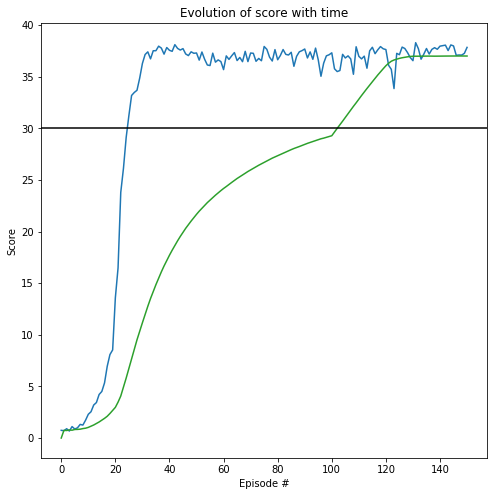

In [21]:
# Calculate average scores of all four Agents with the same window=100 as used in the Q-learning algorithm
mean_score= runningMean(scores, 100)

# Show averages of all fou agents in a single plot for comparison
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, 'tab:blue')
plt.plot(np.arange(len(mean_score)), mean_score, 'tab:green')

plt.axhline(y=30.0, color="Black")

plt.title('Evolution of score with time')
plt.xlabel('Episode #')
plt.ylabel('Score')
plt.show()

# Conclusions and future improvements

In this project I have implemented an Agent using the DDPG algorithm to solve the Unity Reacher Environment with 20 parallel agents.

The performance is as follows:

    The Multi-Agent set-up requires 102 episodes to solve the problem. I evolved the simulation up to 150 episodes and the results remained stable.
    
Therefore, ... text